# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

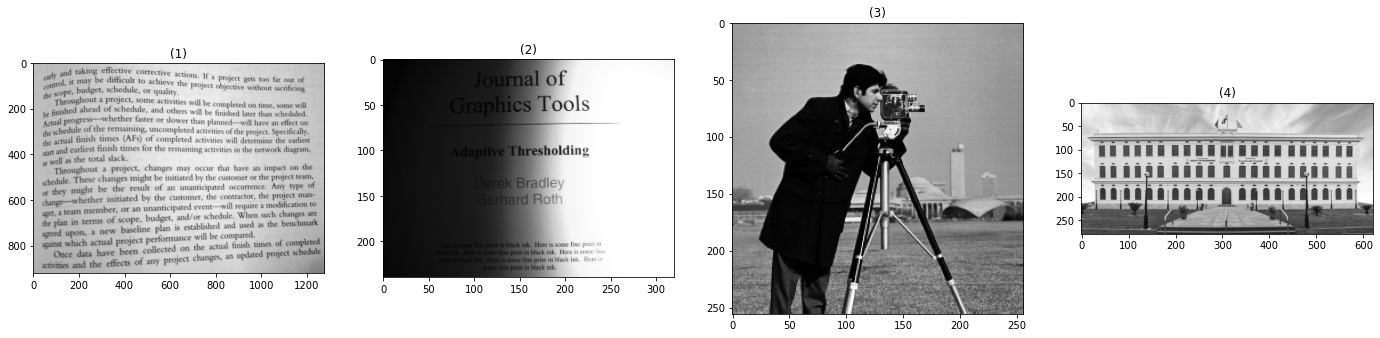

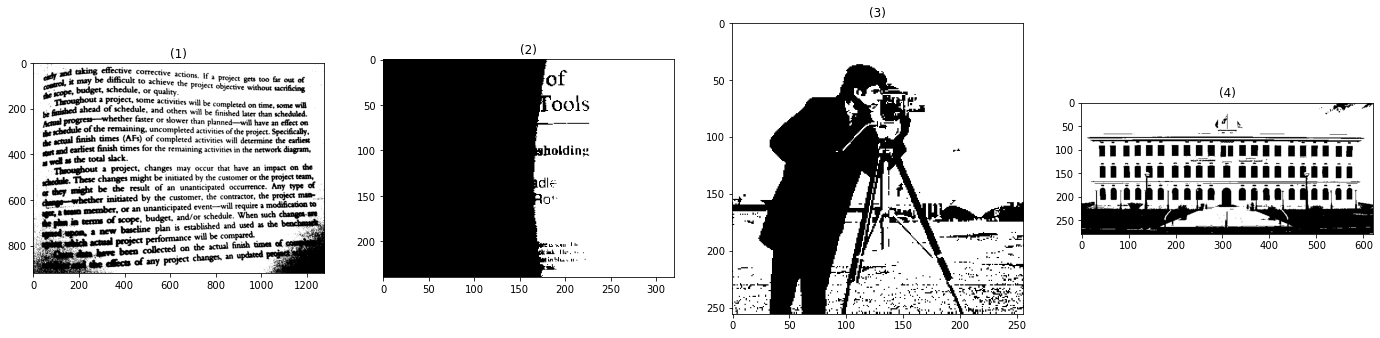

In [66]:
def get_hist(img):
    N, M = img.shape
    hist = np.zeros(256)
    for i in range(N):
        for j in range(M):
            hist[img[i][j]] += 1
    return hist

def get_thresh(hist, i, j):
    thresh = 0
    total = 0
    for i in range(i, j):
        thresh = thresh + i*hist[i]
        total = total + hist[i]
    if total == 0:
        thresh = 0
    else:
        thresh = thresh/total
    return np.round(thresh)

def global_thresh(img):
    # Convert the image to Unit8
    img = np.copy(img).astype(np.uint8)
    # Get counts array that contains the number of pixels in each grey-level
    hist = get_hist(img)
    # Get initial threshold by getting the average mean of the pixels’ grey-level
    prev_thresh = get_thresh(hist, 0, len(hist))

    thresh = 256
    # Get the two weighted averages (means)
    while thresh != prev_thresh:
        # One for the lower pixels (have gray level less than Tinit)
        left = get_thresh(hist, 0, int(prev_thresh))
        # The other for the higher pixels (have gray level more than Tinit)
        right = get_thresh(hist, int(prev_thresh), len(hist))
        if thresh != 256:
            prev_thresh = thresh
        # Update the New threshold to be the average of the two means
        thresh = (right+left)/2
        # Repeat threshold saturates
        
    return prev_thresh

book1 = rgb2gray(io.imread('book1.png'))*255
book = rgb2gray(io.imread('book.png'))
cameraman = rgb2gray(io.imread('cameraman.png'))
cufe = rgb2gray(io.imread('cufe.png'))*255
show_images([book1, book, cameraman, cufe])

book1_thresh = global_thresh(book1)
book_thresh = global_thresh(book)
cameraman_thresh = global_thresh(cameraman)
cufe_thresh = global_thresh(cufe)

bin_book1 = 1.0*(book1 > book1_thresh)
bin_book = 1.0*(book > book_thresh)
bin_cameraman = 1.0*(cameraman > cameraman_thresh)
bin_cufe = 1.0*(cufe > cufe_thresh)
show_images([bin_book1, bin_book, bin_cameraman, bin_cufe])


89.5 95.5 178.0 198.0


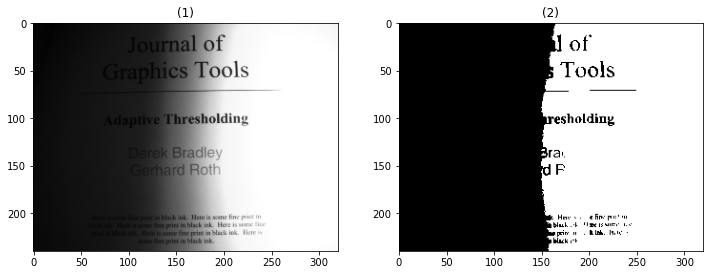

In [44]:
N, M = book.shape
N = 200
M = 400
first_q = book[0:N//2, 0:M//2]
second_q = book[N//2:, 0:M//2]
third_q = book[0:N//2, M//2:]
fourth_q = book[N//2:, M//2:]

first = global_thresh(first_q)
second = global_thresh(second_q)
third = global_thresh(third_q)
fourth = global_thresh(fourth_q)
print(first, second, third, fourth)

first_q = 1.0 * (first_q > first)
second_q = 1.0 * (second_q > second)
third_q = 1.0 * (third_q > third)
fourth_q = 1.0 * (fourth_q > fourth)

img = np.copy(book)
img[0:N//2, 0:M//2] = first_q
img[N//2:, 0:M//2] = second_q
img[0:N//2, M//2:] = third_q
img[N//2:, M//2:] = fourth_q

show_images([book, img])
